![](https://i.imgur.com/0AUxkXt.png)

# Lecture 3 - Data Manipulation

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

## Filling missing data


In [0]:
# https://www.kaggle.com/camnugent/california-housing-prices
housing = pd.read_csv("https://khoi-public.s3-ap-southeast-1.amazonaws.com/housing.csv")

In [0]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [0]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [0]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


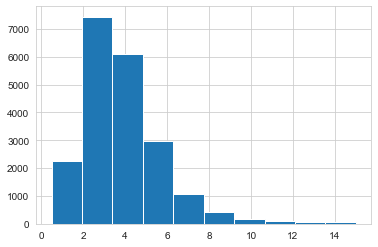

In [0]:
housing["median_income"].hist()

In [0]:
# feature enginerring, adding new feature
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=["Poor", "Alright", "Good", "Rich", "Hell Yeah"])
housing["income_cat"].value_counts()

## Some visualization

In [0]:
housing.plot(kind="scatter",x="longitude", y="latitude", alpha=0.1)

In [0]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

In [0]:
import matplotlib.image as mpimg
california_img = mpimg.imread('https://khoi-public.s3-ap-southeast-1.amazonaws.com/california-state-map.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [0]:
corr_matrix = housing.corr()
corr_matrix

In [0]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

What other features that could be engineered in to predict the housing price?


## Filling missing values

In [0]:
housing[housing["total_bedrooms"].isna()]

In [0]:
housing["total_bedrooms"].fillna(housing["total_bedrooms"].median(), inplace=True)

## Practice

**Handling with different format of phone numbers**

In [0]:
phoneNumbers = ['      392969437', '339599939', '+(84)982554028', '0084982554028', '939224327',
       '929221869', '982554028', '+(84)906670964', '0084971117397', '974914174',
       '945481728    ', '84925481146', '332696839', '814200997', '798030258',
       '843756291', '904864089', '972647803', '907491419     ',
       '+84 938 175 164', '962687145', '972996711', '908271465',
       '907292137', '395180750', '     906789743', '767693801', '813994299',
       '366132601', '866765227', '+(84) 359636387', '+84969541095',
       '965918383', '849541095', '84934116689']

df = pd.DataFrame(phoneNumbers, columns=['phone'])
df.head()

Let's assume that a valid phone number is:
- Start with `0`
- Must have the len of 10

Build a new column called `phone_normalized` that contains the processed `phone`